# Dataset Exploration

Diagnostic analyses for the StepMania chart dataset with source comparison for 2-head experiment.

**Sections 1-6**: Basic dataset diagnostics using named difficulty classes (Beginner, Easy, Medium, Hard)  
**Sections 7-11**: Source analysis comparing community vs official charts

In [1]:
import sys
sys.path.insert(0, '..')

import os
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
from tqdm import tqdm
from scipy import stats

from src.data.stepmania_parser import StepManiaParser
from src.data.dataset import get_difficulty_class, DIFFICULTY_NAMES

plt.style.use('seaborn-v0_8-darkgrid')
%matplotlib inline

In [2]:
# Parse all charts from both sources
DATA_DIRS = {
    'community': '../data/community',
    'official': '../data/external'
}
parser = StepManiaParser()

charts = []  # List of dicts with song, difficulty_class, difficulty_name, source, tensor, seq_len
failed = []

for source, data_dir in DATA_DIRS.items():
    if not os.path.exists(data_dir):
        print(f"Warning: {data_dir} does not exist, skipping...")
        continue
    
    for root, dirs, files in os.walk(data_dir):
        for file in files:
            if file.endswith('.sm'):
                path = os.path.join(root, file)
                try:
                    result = parser.process_chart(path)
                    if result:
                        chart, tensors = result
                        for i, nd in enumerate(chart.note_data):
                            diff_class = get_difficulty_class(nd.difficulty_name)
                            if diff_class is not None:
                                charts.append({
                                    'song': chart.title,
                                    'difficulty_class': diff_class,
                                    'difficulty_name': DIFFICULTY_NAMES[diff_class],
                                    'source': source,
                                    'tensor': tensors[i],
                                    'seq_len': tensors[i].shape[0]
                                })
                except Exception as e:
                    failed.append((path, str(e)))

print(f"Parsed {len(charts)} charts from {len(set(c['song'] for c in charts))} songs")
print(f"  Community: {sum(1 for c in charts if c['source'] == 'community')} charts")
print(f"  Official:  {sum(1 for c in charts if c['source'] == 'official')} charts")
print(f"Failed: {len(failed)}")

Error processing ../data/community/-_-/Dogfight/DOGFIGHT.sm: Variable BPM not supported in Phase 1
Hau Ruck failed song length requirement
Ideal failed song length requirement
Disconnected Karma failed bpm requirement
Synahouse(?) failed song length requirement
Error processing ../data/community/-_-/Akai Suzu/Akai Suzu.sm: Variable BPM not supported in Phase 1
Scotty doesnt know failed valid chart requirement (no dance-single charts)
- Friday I'm in Love failed valid chart requirement (no dance-single charts)
Despre tine failed valid chart requirement (no dance-single charts)
7 Years & 50 Days (Cascada remix) failed valid chart requirement (no dance-single charts)
Dont you know failed valid chart requirement (no dance-single charts)
Rise failed valid chart requirement (no dance-single charts)
velaachlorine's OP failed song length requirement
Error processing ../data/community/ricetoasted/.ricetoasted/Freestyle (ricetoast)/work to do.sm: Variable BPM not supported in Phase 1
comment te 

[src/libmpg123/id3.c:process_comment():587] error: No comment text / valid description?
[src/libmpg123/id3.c:process_comment():587] error: No comment text / valid description?
[src/libmpg123/id3.c:process_comment():587] error: No comment text / valid description?
[src/libmpg123/id3.c:process_comment():587] error: No comment text / valid description?
[src/libmpg123/id3.c:process_comment():587] error: No comment text / valid description?
[src/libmpg123/id3.c:process_comment():587] error: No comment text / valid description?
[src/libmpg123/id3.c:process_comment():587] error: No comment text / valid description?


Twisted Drop Party failed song length requirement
Error processing ../data/community/#774 Etterna Explosion Excitepack/PPPENIS (DOURWORLD)/PPPENIS.sm: Variable BPM not supported in Phase 1
POISON(Nightcore) failed bpm requirement
クラムボン failed bpm requirement
Win The Race failed song length requirement
ボッカデラベリタ failed song length requirement
DROP OUT (FROM NONSTOP MEGAMIX) failed bpm requirement
Odin failed song length requirement
Sky is the Limit failed song length requirement
Recharge Your Resonator failed song length requirement
ダーリンダンス failed song length requirement
透靈華 failed bpm requirement
Error processing ../data/community/#774 Etterna Explosion Excitepack/Team Magma & Aqua Leader Battle Theme (Unofficial) (loafusofbread)/Team_Magma_&_Aqua_Leader_Battle_Theme_Unofficial.sm: Variable BPM not supported in Phase 1
SUPER SUMMER DIVE!! failed song length requirement
えんどろ～る! -SN Remix- failed song length requirement
Error processing ../data/community/#774 Etterna Explosion Excitepack/

[src/libmpg123/id3.c:process_comment():587] error: No comment text / valid description?
[src/libmpg123/id3.c:process_comment():587] error: No comment text / valid description?
[src/libmpg123/id3.c:process_comment():587] error: No comment text / valid description?
[src/libmpg123/id3.c:process_comment():587] error: No comment text / valid description?
[src/libmpg123/id3.c:process_comment():587] error: No comment text / valid description?


Dragon Blade failed bpm requirement
Error processing ../data/community/-Silenttype01's DDR Edits-/L'amour et la liberte (DDR ver.)/L'amour et la liberte (DDR ver.).sm: Variable BPM not supported in Phase 1
Error processing ../data/community/-Silenttype01's DDR Edits-/Trim/Trim.sm: Variable BPM not supported in Phase 1
Error processing ../data/community/-Silenttype01's DDR Edits-/MAX 300/MAX 300.sm: Variable BPM not supported in Phase 1
Error processing ../data/community/-Silenttype01's DDR Edits-/MIKENEKO ROCK/MIKENEKO ROCK.sm: Variable BPM not supported in Phase 1
Error processing ../data/community/-Silenttype01's DDR Edits-/SANA MOLLETE NE ENTE (B.L.T.STYLE)/SANA MOLLETE NE ENTE (B.L.T.STYLE).sm: Variable BPM not supported in Phase 1
volcano failed bpm requirement
Error processing ../data/community/-Silenttype01's DDR Edits-/Don't Stop! ~AMD 2nd MIX~/Don't Stop! ~AMD 2nd MIX~.sm: Audio file not found: ../data/community/-Silenttype01's DDR Edits-/Don't Stop! ~AMD 2nd MIX~/Don't stop! 

Heaven's Fall failed song length requirement
Elder Dragon Legend failed bpm requirement
Lyrith -Meikyuu Lyrith- failed song length requirement
HAVOX failed bpm requirement
Error processing ../data/community/'d/i want to tell you that i love you (DDMythical)/love.sm: Variable BPM not supported in Phase 1
The Real Slim Shady failed song length requirement
video out e failed bpm requirement
Error processing ../data/community/'d/THE METAL (DDMythical)/THE_METAL_resync.sm: Variable BPM not supported in Phase 1
Evanescent failed song length requirement
Ukigumo failed song length requirement
Angel Dust 2016 failed song length requirement
Archangel failed bpm requirement
You Wouldn't Know Me failed song length requirement
Flower Dance failed song length requirement
Rock It For Me failed song length requirement
Proof of the Existence failed song length requirement
2014-05-20 - FDBT failed song length requirement
12 Closure - K_bry, Lil Dovas, Bigdog30k, With3r failed song length requirement
Err

初音ミクの消失 failed bpm requirement
Error processing ../data/external/pack_1148_d070d8/Towards The TOWER/Towards The TOWER.sm: Variable BPM not supported in Phase 1
Error processing ../data/external/pack_1148_d070d8/Renaikansoku/Renaikansoku.sm: Variable BPM not supported in Phase 1
Error processing ../data/external/pack_1148_d070d8/Cytokinesis/Cytokinesis.sm: Variable BPM not supported in Phase 1
Error processing ../data/external/pack_1148_d070d8/Kunshi ayauku mo chikou yore/Kunshi ayauku mo chikou yore.sm: Variable BPM not supported in Phase 1
Error processing ../data/external/pack_1148_d070d8/Come to Life/Come to Life.sm: Variable BPM not supported in Phase 1
ロストワンの号哭 failed song length requirement
Error processing ../data/external/pack_1148_d070d8/Boss Rush/Boss Rush.sm: Variable BPM not supported in Phase 1
Error processing ../data/external/pack_1148_d070d8/Kurokami midareshi shura to narite ~Rin edition~/Kurokami midareshi shura to narite ~Rin edition~.sm: Variable BPM not supported i

Error processing ../data/external/pack_845_d68c34/Summer Fairytale/Summer Fairytale.sm: Variable BPM not supported in Phase 1
Error processing ../data/external/pack_845_d68c34/GAIA/GAIA.sm: Variable BPM not supported in Phase 1
Error processing ../data/external/pack_845_d68c34/escape/escape.sm: Variable BPM not supported in Phase 1
Error processing ../data/external/pack_845_d68c34/Meumeupettantan!!/Meumeupettantan!!.sm: Variable BPM not supported in Phase 1
Error processing ../data/external/pack_845_d68c34/Everything I Need/Everything I Need.sm: Variable BPM not supported in Phase 1
Error processing ../data/external/pack_845_d68c34/THE REASON/THE REASON.sm: Variable BPM not supported in Phase 1
Error processing ../data/external/pack_845_d68c34/Elemental Creation/Elemental Creation.sm: Variable BPM not supported in Phase 1
Error processing ../data/external/pack_845_d68c34/Triple Journey -TAG EDITION-/Triple Journey -TAG EDITION-.sm: Variable BPM not supported in Phase 1
Error processing

Idola failed bpm requirement
ドリームキャッチャー failed bpm requirement
Thank You Merry Christmas failed bpm requirement
Error processing ../data/external/pack_864_7534cd/In The Breeze/In The Breeze.sm: Variable BPM not supported in Phase 1
Error processing ../data/external/pack_864_7534cd/FUNKY SUMMER BEACH/FUNKY SUMMER BEACH.sm: Variable BPM not supported in Phase 1
Error processing ../data/external/pack_864_7534cd/Destination/Destination.sm: Variable BPM not supported in Phase 1
Error processing ../data/external/pack_864_7534cd/Over The Period/Over The Period.sm: Variable BPM not supported in Phase 1
Error processing ../data/external/pack_864_7534cd/8000000/8000000.sm: Variable BPM not supported in Phase 1
Error processing ../data/external/pack_864_7534cd/Tenkuu no hana/Tenkuu no hana.sm: Variable BPM not supported in Phase 1
Go↓Go↑Girls&Boys! failed song length requirement
Error processing ../data/external/pack_864_7534cd/Habibe(Antuh muhleke)/Habibe(Antuh muhleke).sm: Audio file not found:

[src/libmpg123/id3.c:process_comment():587] error: No comment text / valid description?
[src/libmpg123/id3.c:process_comment():587] error: No comment text / valid description?
[src/libmpg123/id3.c:process_comment():587] error: No comment text / valid description?
[src/libmpg123/id3.c:process_comment():587] error: No comment text / valid description?
[src/libmpg123/id3.c:process_comment():587] error: No comment text / valid description?
[src/libmpg123/id3.c:process_comment():587] error: No comment text / valid description?
[src/libmpg123/id3.c:process_comment():587] error: No comment text / valid description?
[src/libmpg123/id3.c:process_comment():587] error: No comment text / valid description?
[src/libmpg123/id3.c:process_comment():587] error: No comment text / valid description?
[src/libmpg123/id3.c:process_comment():587] error: No comment text / valid description?
[src/libmpg123/id3.c:process_comment():587] error: No comment text / valid description?
[src/libmpg123/id3.c:process_com

Error processing ../data/external/pack_41_4ca62c/AM-3P -303 BASS MIX-/AM-3P -303 BASS MIX-.sm: Variable BPM not supported in Phase 1
Error processing ../data/external/pack_41_4ca62c/Look To The Sky(True Color Mix)/Look To The Sky(True Color Mix).sm: Variable BPM not supported in Phase 1
Error processing ../data/external/pack_41_4ca62c/BE LOVIN/BE LOVIN.sm: Variable BPM not supported in Phase 1
Error processing ../data/external/pack_41_4ca62c/LA BAMBA/LA BAMBA.sm: Variable BPM not supported in Phase 1
Error processing ../data/external/pack_41_4ca62c/Frozen Ray(for EXTREME)/Frozen Ray(for EXTREME).sm: Variable BPM not supported in Phase 1
Error processing ../data/external/pack_41_4ca62c/KISS KISS KISS/KISS KISS KISS.sm: Variable BPM not supported in Phase 1
Error processing ../data/external/pack_41_4ca62c/SAKURA/SAKURA.sm: Variable BPM not supported in Phase 1
Error processing ../data/external/pack_41_4ca62c/LOVE LOVE SUGAR/LOVE LOVE SUGAR.sm: Variable BPM not supported in Phase 1
Error 

Error processing ../data/external/pack_32_7d5f39/MAKE IT BETTER (So-REAL Mix)/MAKE IT BETTER (So-REAL Mix).sm: Variable BPM not supported in Phase 1
Error processing ../data/external/pack_32_7d5f39/PARANOiA MAX~DIRTY MIX~ (in roulette)/PARANOiA MAX~DIRTY MIX~ (in roulette).sm: Variable BPM not supported in Phase 1
Error processing ../data/external/pack_32_7d5f39/PARANOiA MAX~DIRTY MIX~/PARANOiA MAX~DIRTY MIX~.sm: Variable BPM not supported in Phase 1
Error processing ../data/external/pack_32_7d5f39/AM-3P/AM-3P.sm: Variable BPM not supported in Phase 1
Error processing ../data/external/pack_32_7d5f39/Smoke/Smoke.sm: Variable BPM not supported in Phase 1
Error processing ../data/external/pack_32_7d5f39/I Believe In Miracles (The Lisa Marie Experience Radio Edit)/I Believe In Miracles (The Lisa Marie Experience Radio Edit).sm: Variable BPM not supported in Phase 1
Error processing ../data/external/pack_504_61c205/AROMDAON 21C/AROMDAON 21C.sm: Variable BPM not supported in Phase 1
Error pr

## 1. Charts per Named Difficulty Class

Shows class imbalance across the 4 difficulty categories.

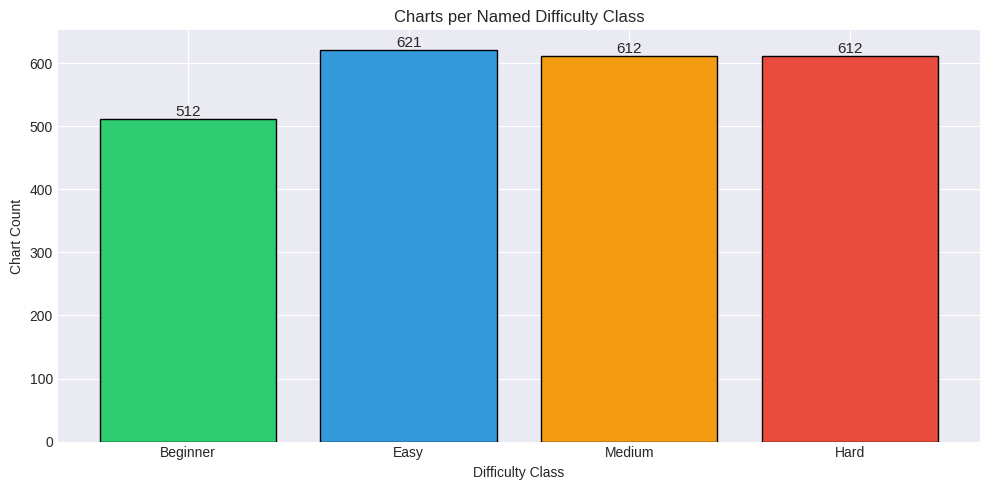

In [3]:
diff_counts = {name: sum(1 for c in charts if c['difficulty_name'] == name) for name in DIFFICULTY_NAMES}

fig, ax = plt.subplots(figsize=(10, 5))
bars = ax.bar(DIFFICULTY_NAMES, [diff_counts[name] for name in DIFFICULTY_NAMES], 
              color=['#2ecc71', '#3498db', '#f39c12', '#e74c3c'], edgecolor='black')
ax.set_xlabel('Difficulty Class')
ax.set_ylabel('Chart Count')
ax.set_title('Charts per Named Difficulty Class')

for bar, name in zip(bars, DIFFICULTY_NAMES):
    ax.annotate(str(diff_counts[name]), (bar.get_x() + bar.get_width()/2, bar.get_height()), 
                ha='center', va='bottom', fontsize=11)

plt.tight_layout()
plt.show()

# Check for issues
if 0 in diff_counts.values():
    print("WARNING: Missing difficulty classes!")
if max(diff_counts.values()) > 3 * min(d for d in diff_counts.values() if d > 0):
    print("WARNING: Significant class imbalance - consider class weighting")

## 2. Songs per Named Difficulty Class

Checks if some difficulties are "fake plentiful" (many charts, few unique songs).

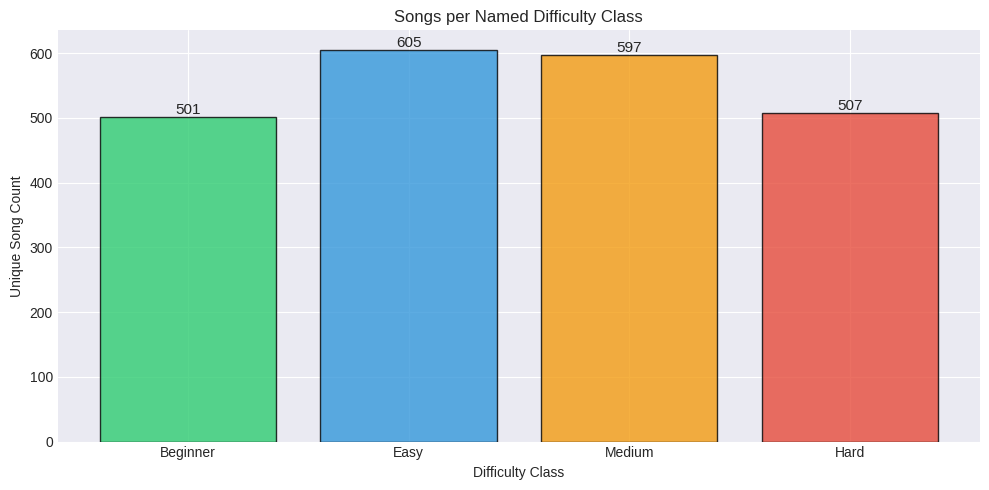

In [4]:
songs_per_diff = defaultdict(set)
for c in charts:
    songs_per_diff[c['difficulty_name']].add(c['song'])

song_counts = {name: len(songs_per_diff[name]) for name in DIFFICULTY_NAMES}

fig, ax = plt.subplots(figsize=(10, 5))
bars = ax.bar(DIFFICULTY_NAMES, [song_counts[name] for name in DIFFICULTY_NAMES], 
              color=['#2ecc71', '#3498db', '#f39c12', '#e74c3c'], edgecolor='black', alpha=0.8)
ax.set_xlabel('Difficulty Class')
ax.set_ylabel('Unique Song Count')
ax.set_title('Songs per Named Difficulty Class')

for bar, name in zip(bars, DIFFICULTY_NAMES):
    ax.annotate(str(song_counts[name]), (bar.get_x() + bar.get_width()/2, bar.get_height()), 
                ha='center', va='bottom', fontsize=11)

plt.tight_layout()
plt.show()

## 3. Charts per Song

Shows how much audio reuse there is across difficulty levels.

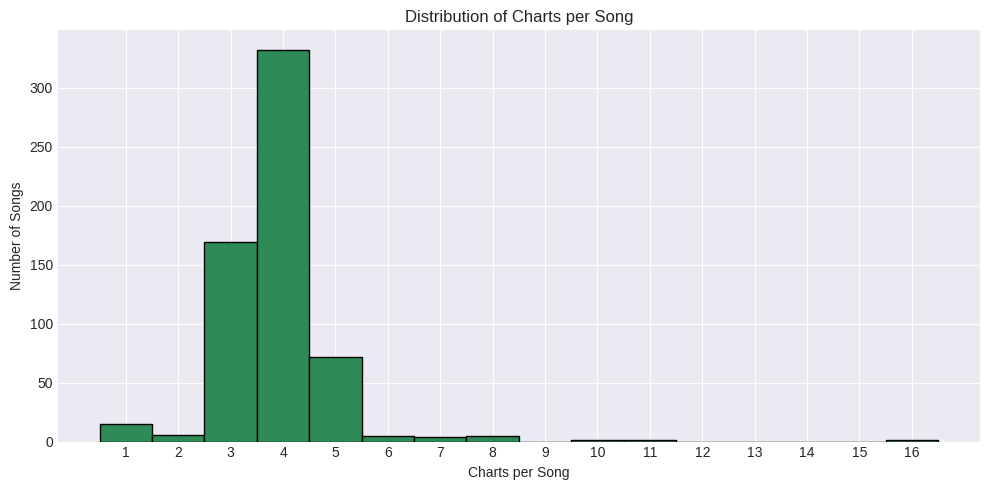

Mean: 3.9 charts/song
Median: 4 charts/song


In [5]:
charts_per_song = defaultdict(int)
for c in charts:
    charts_per_song[c['song']] += 1

counts = list(charts_per_song.values())

fig, ax = plt.subplots(figsize=(10, 5))
ax.hist(counts, bins=range(1, max(counts) + 2), color='seagreen', edgecolor='black', align='left')
ax.set_xlabel('Charts per Song')
ax.set_ylabel('Number of Songs')
ax.set_title('Distribution of Charts per Song')
ax.set_xticks(range(1, max(counts) + 1))

plt.tight_layout()
plt.show()

print(f"Mean: {np.mean(counts):.1f} charts/song")
print(f"Median: {np.median(counts):.0f} charts/song")

## 4. Sequence Length Distribution

Ensures max_sequence_length isn't silently truncating data.

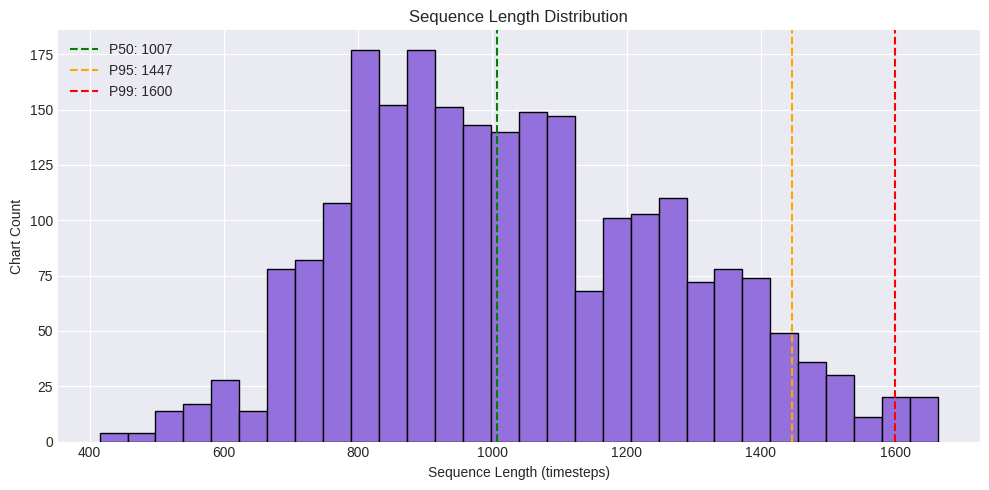

Min: 415, Max: 1664
Recommended max_sequence_length (P95): 1447


In [6]:
seq_lengths = [c['seq_len'] for c in charts]

fig, ax = plt.subplots(figsize=(10, 5))
ax.hist(seq_lengths, bins=30, color='mediumpurple', edgecolor='black')
ax.set_xlabel('Sequence Length (timesteps)')
ax.set_ylabel('Chart Count')
ax.set_title('Sequence Length Distribution')

# Add percentile lines
p50 = np.percentile(seq_lengths, 50)
p95 = np.percentile(seq_lengths, 95)
p99 = np.percentile(seq_lengths, 99)
ax.axvline(p50, color='green', linestyle='--', label=f'P50: {p50:.0f}')
ax.axvline(p95, color='orange', linestyle='--', label=f'P95: {p95:.0f}')
ax.axvline(p99, color='red', linestyle='--', label=f'P99: {p99:.0f}')
ax.legend()

plt.tight_layout()
plt.show()

print(f"Min: {min(seq_lengths)}, Max: {max(seq_lengths)}")
print(f"Recommended max_sequence_length (P95): {int(p95)}")

## 5. Step Density vs Named Difficulty

Should show clear separation between difficulty classes.

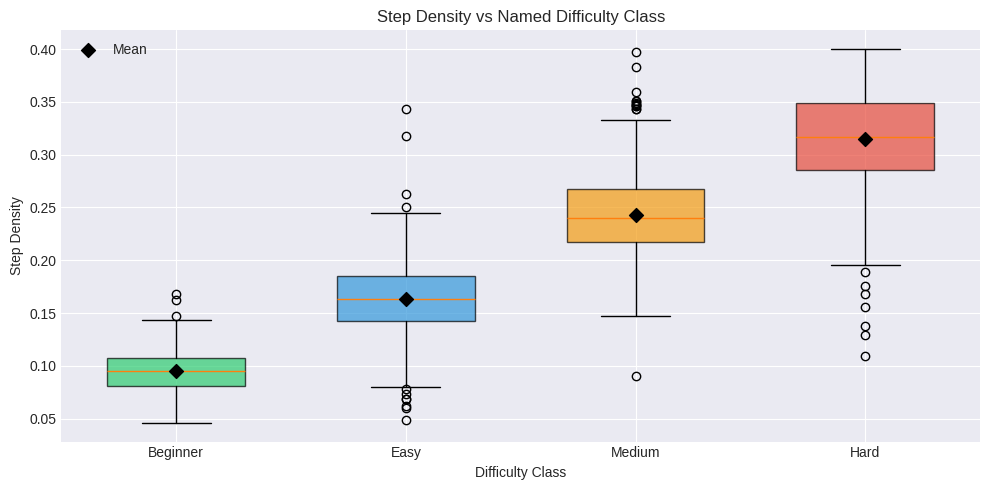

Mean step density by difficulty:
  Beginner: 0.095
  Easy: 0.164
  Medium: 0.243
  Hard: 0.315


In [7]:
def step_density(tensor):
    """Fraction of timesteps with at least one note"""
    return np.mean(np.sum(tensor, axis=1) > 0)

# Calculate densities grouped by difficulty class
density_by_diff = {name: [] for name in DIFFICULTY_NAMES}
for c in charts:
    density_by_diff[c['difficulty_name']].append(step_density(c['tensor']))

fig, ax = plt.subplots(figsize=(10, 5))
positions = range(len(DIFFICULTY_NAMES))
bp = ax.boxplot([density_by_diff[name] for name in DIFFICULTY_NAMES], 
                positions=positions, patch_artist=True, widths=0.6)

colors = ['#2ecc71', '#3498db', '#f39c12', '#e74c3c']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

ax.set_xlabel('Difficulty Class')
ax.set_ylabel('Step Density')
ax.set_title('Step Density vs Named Difficulty Class')
ax.set_xticks(positions)
ax.set_xticklabels(DIFFICULTY_NAMES)

# Add mean values
means = [np.mean(density_by_diff[name]) for name in DIFFICULTY_NAMES]
ax.scatter(positions, means, color='black', marker='D', s=50, zorder=3, label='Mean')
ax.legend()

plt.tight_layout()
plt.show()

# Check trend
print("Mean step density by difficulty:")
for name in DIFFICULTY_NAMES:
    print(f"  {name}: {np.mean(density_by_diff[name]):.3f}")

## 6. Jump Ratio vs Named Difficulty

Checks that chart complexity (jumps) aligns with difficulty labels.

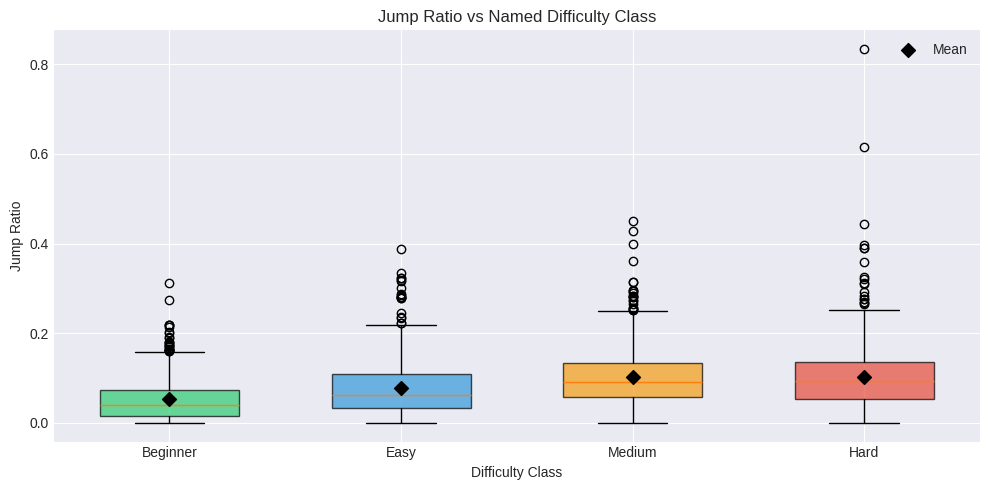

Mean jump ratio by difficulty:
  Beginner: 0.052
  Easy: 0.077
  Medium: 0.102
  Hard: 0.103


In [8]:
def jump_ratio(tensor):
    """Fraction of active timesteps that are jumps (2 simultaneous notes)"""
    notes_per_step = np.sum(tensor, axis=1)
    active_steps = notes_per_step > 0
    if np.sum(active_steps) == 0:
        return 0
    jumps = notes_per_step == 2
    return np.sum(jumps) / np.sum(active_steps)

# Calculate jump ratios grouped by difficulty class
jump_by_diff = {name: [] for name in DIFFICULTY_NAMES}
for c in charts:
    jump_by_diff[c['difficulty_name']].append(jump_ratio(c['tensor']))

fig, ax = plt.subplots(figsize=(10, 5))
positions = range(len(DIFFICULTY_NAMES))
bp = ax.boxplot([jump_by_diff[name] for name in DIFFICULTY_NAMES], 
                positions=positions, patch_artist=True, widths=0.6)

colors = ['#2ecc71', '#3498db', '#f39c12', '#e74c3c']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

ax.set_xlabel('Difficulty Class')
ax.set_ylabel('Jump Ratio')
ax.set_title('Jump Ratio vs Named Difficulty Class')
ax.set_xticks(positions)
ax.set_xticklabels(DIFFICULTY_NAMES)

# Add mean values
means = [np.mean(jump_by_diff[name]) for name in DIFFICULTY_NAMES]
ax.scatter(positions, means, color='black', marker='D', s=50, zorder=3, label='Mean')
ax.legend()

plt.tight_layout()
plt.show()

# Check trend
print("Mean jump ratio by difficulty:")
for name in DIFFICULTY_NAMES:
    print(f"  {name}: {np.mean(jump_by_diff[name]):.3f}")

---

# Source Analysis for 2-Head Experiment

The following visualizations compare community-authored vs official charts to validate the hypothesis that "style" and "difficulty" are separable dimensions.

## 7. Source Distribution

Total charts and unique songs by source (community vs official).

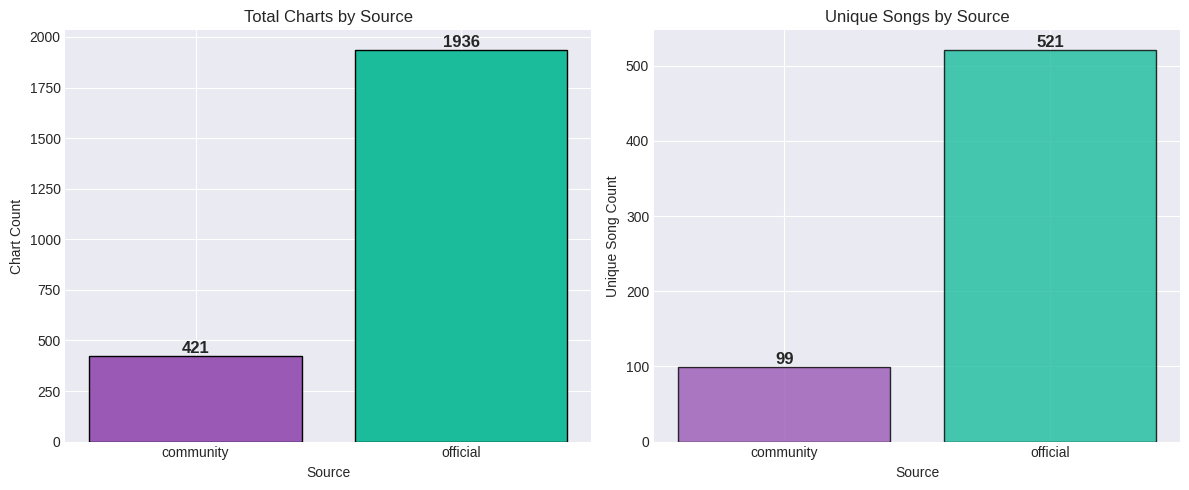

Community: 4.25 charts/song
Official: 3.72 charts/song


In [9]:
sources = ['community', 'official']
source_colors = {'community': '#9b59b6', 'official': '#1abc9c'}

# Charts by source
chart_by_source = {s: sum(1 for c in charts if c['source'] == s) for s in sources}

# Songs by source  
songs_by_source = {s: len(set(c['song'] for c in charts if c['source'] == s)) for s in sources}

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Charts
bars1 = axes[0].bar(sources, [chart_by_source[s] for s in sources], 
                    color=[source_colors[s] for s in sources], edgecolor='black')
axes[0].set_xlabel('Source')
axes[0].set_ylabel('Chart Count')
axes[0].set_title('Total Charts by Source')
for bar, s in zip(bars1, sources):
    axes[0].annotate(str(chart_by_source[s]), (bar.get_x() + bar.get_width()/2, bar.get_height()), 
                     ha='center', va='bottom', fontsize=12, fontweight='bold')

# Songs
bars2 = axes[1].bar(sources, [songs_by_source[s] for s in sources], 
                    color=[source_colors[s] for s in sources], edgecolor='black', alpha=0.8)
axes[1].set_xlabel('Source')
axes[1].set_ylabel('Unique Song Count')
axes[1].set_title('Unique Songs by Source')
for bar, s in zip(bars2, sources):
    axes[1].annotate(str(songs_by_source[s]), (bar.get_x() + bar.get_width()/2, bar.get_height()), 
                     ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

# Charts per song ratio
for s in sources:
    ratio = chart_by_source[s] / songs_by_source[s] if songs_by_source[s] > 0 else 0
    print(f"{s.capitalize()}: {ratio:.2f} charts/song")

## 8. Source × Difficulty Cross-Tabulation

Shows how difficulty distributions differ between community and official charts.

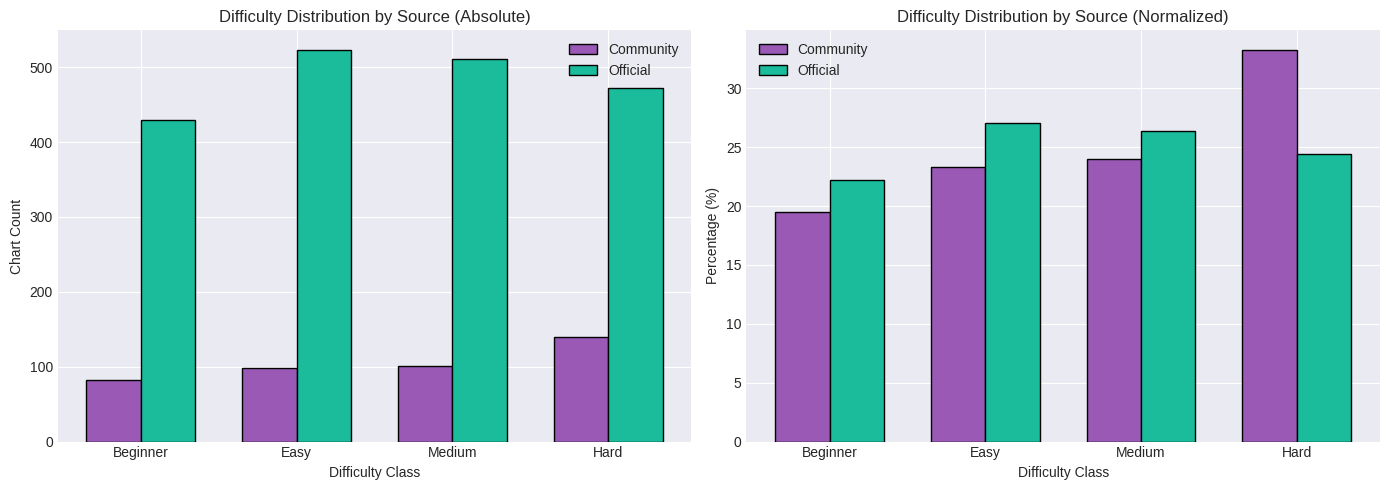


Chi-square test for independence:
  Chi2 = 14.28, df = 3, p-value = 2.5489e-03
  Result: Difficulty distributions are SIGNIFICANTLY DIFFERENT between sources

Cross-tabulation (Source × Difficulty):
               Beginner       Easy     Medium       Hard      Total
-----------------------------------------------------------------
Community            82         98        101        140        421
Official            430        523        511        472       1936
-----------------------------------------------------------------
Total               512        621        612        612       2357


In [10]:
# Build cross-tabulation matrix
crosstab = np.zeros((len(sources), len(DIFFICULTY_NAMES)), dtype=int)
for c in charts:
    source_idx = sources.index(c['source'])
    diff_idx = c['difficulty_class']
    crosstab[source_idx, diff_idx] += 1

# Grouped bar chart
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Absolute counts
x = np.arange(len(DIFFICULTY_NAMES))
width = 0.35
bars1 = axes[0].bar(x - width/2, crosstab[0], width, label='Community', color=source_colors['community'], edgecolor='black')
bars2 = axes[0].bar(x + width/2, crosstab[1], width, label='Official', color=source_colors['official'], edgecolor='black')
axes[0].set_xlabel('Difficulty Class')
axes[0].set_ylabel('Chart Count')
axes[0].set_title('Difficulty Distribution by Source (Absolute)')
axes[0].set_xticks(x)
axes[0].set_xticklabels(DIFFICULTY_NAMES)
axes[0].legend()

# Normalized (percentage within each source)
crosstab_norm = crosstab / crosstab.sum(axis=1, keepdims=True) * 100
bars3 = axes[1].bar(x - width/2, crosstab_norm[0], width, label='Community', color=source_colors['community'], edgecolor='black')
bars4 = axes[1].bar(x + width/2, crosstab_norm[1], width, label='Official', color=source_colors['official'], edgecolor='black')
axes[1].set_xlabel('Difficulty Class')
axes[1].set_ylabel('Percentage (%)')
axes[1].set_title('Difficulty Distribution by Source (Normalized)')
axes[1].set_xticks(x)
axes[1].set_xticklabels(DIFFICULTY_NAMES)
axes[1].legend()

plt.tight_layout()
plt.show()

# Chi-square test for independence
chi2, p_value, dof, expected = stats.chi2_contingency(crosstab)
print(f"\nChi-square test for independence:")
print(f"  Chi2 = {chi2:.2f}, df = {dof}, p-value = {p_value:.4e}")
if p_value < 0.05:
    print("  Result: Difficulty distributions are SIGNIFICANTLY DIFFERENT between sources")
else:
    print("  Result: No significant difference in difficulty distributions")

# Print the cross-tabulation table
print(f"\nCross-tabulation (Source × Difficulty):")
print(f"{'':12} " + " ".join(f"{name:>10}" for name in DIFFICULTY_NAMES) + f" {'Total':>10}")
print("-" * 65)
for i, source in enumerate(sources):
    row = " ".join(f"{crosstab[i, j]:>10}" for j in range(len(DIFFICULTY_NAMES)))
    print(f"{source.capitalize():12} {row} {crosstab[i].sum():>10}")
print("-" * 65)
totals = " ".join(f"{crosstab[:, j].sum():>10}" for j in range(len(DIFFICULTY_NAMES)))
print(f"{'Total':12} {totals} {crosstab.sum():>10}")

## 9. Feature Distributions by Source

Compares step density and jump ratio between community and official charts.

/tmp/ipykernel_70471/847348662.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp1 = axes[0].boxplot([density_by_source[s] for s in sources],
/tmp/ipykernel_70471/847348662.py:22: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp2 = axes[1].boxplot([jump_by_source[s] for s in sources],


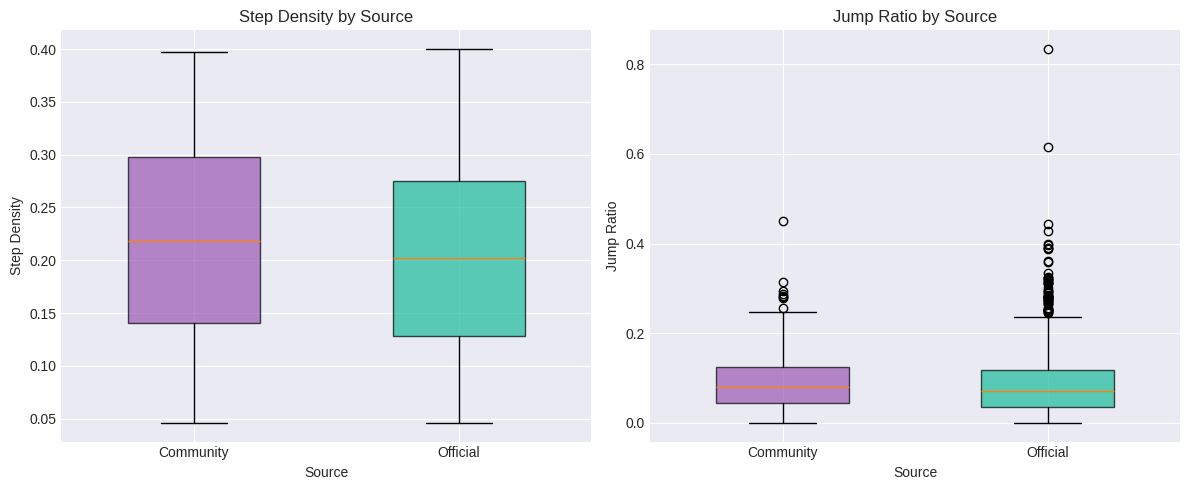

Mann-Whitney U Test (non-parametric comparison):
--------------------------------------------------

Step Density:
  Community mean: 0.2222
  Official mean:  0.2057
  U-statistic: 451270, p-value: 5.4761e-04
  SIGNIFICANT difference

Jump Ratio:
  Community mean: 0.0908
  Official mean:  0.0835
  U-statistic: 440890, p-value: 8.3827e-03
  SIGNIFICANT difference


In [11]:
# Calculate features by source
density_by_source = {s: [] for s in sources}
jump_by_source = {s: [] for s in sources}

for c in charts:
    density_by_source[c['source']].append(step_density(c['tensor']))
    jump_by_source[c['source']].append(jump_ratio(c['tensor']))

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Step Density by Source
bp1 = axes[0].boxplot([density_by_source[s] for s in sources], 
                       labels=[s.capitalize() for s in sources], patch_artist=True, widths=0.5)
for patch, s in zip(bp1['boxes'], sources):
    patch.set_facecolor(source_colors[s])
    patch.set_alpha(0.7)
axes[0].set_xlabel('Source')
axes[0].set_ylabel('Step Density')
axes[0].set_title('Step Density by Source')

# Jump Ratio by Source
bp2 = axes[1].boxplot([jump_by_source[s] for s in sources], 
                       labels=[s.capitalize() for s in sources], patch_artist=True, widths=0.5)
for patch, s in zip(bp2['boxes'], sources):
    patch.set_facecolor(source_colors[s])
    patch.set_alpha(0.7)
axes[1].set_xlabel('Source')
axes[1].set_ylabel('Jump Ratio')
axes[1].set_title('Jump Ratio by Source')

plt.tight_layout()
plt.show()

# Statistical comparison (Mann-Whitney U test - non-parametric)
print("Mann-Whitney U Test (non-parametric comparison):")
print("-" * 50)

# Step density
stat_d, p_d = stats.mannwhitneyu(density_by_source['community'], density_by_source['official'], alternative='two-sided')
print(f"\nStep Density:")
print(f"  Community mean: {np.mean(density_by_source['community']):.4f}")
print(f"  Official mean:  {np.mean(density_by_source['official']):.4f}")
print(f"  U-statistic: {stat_d:.0f}, p-value: {p_d:.4e}")
print(f"  {'SIGNIFICANT' if p_d < 0.05 else 'Not significant'} difference")

# Jump ratio
stat_j, p_j = stats.mannwhitneyu(jump_by_source['community'], jump_by_source['official'], alternative='two-sided')
print(f"\nJump Ratio:")
print(f"  Community mean: {np.mean(jump_by_source['community']):.4f}")
print(f"  Official mean:  {np.mean(jump_by_source['official']):.4f}")
print(f"  U-statistic: {stat_j:.0f}, p-value: {p_j:.4e}")
print(f"  {'SIGNIFICANT' if p_j < 0.05 else 'Not significant'} difference")

## 10. Pattern Style Differences by Source

Compares pattern characteristics that may distinguish "authoring culture" between sources.

/tmp/ipykernel_70471/2925923074.py:68: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = axes[idx].boxplot([feat_data[s] for s in sources],
/tmp/ipykernel_70471/2925923074.py:68: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = axes[idx].boxplot([feat_data[s] for s in sources],
/tmp/ipykernel_70471/2925923074.py:68: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = axes[idx].boxplot([feat_data[s] for s in sources],
/tmp/ipykernel_70471/2925923074.py:68: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 

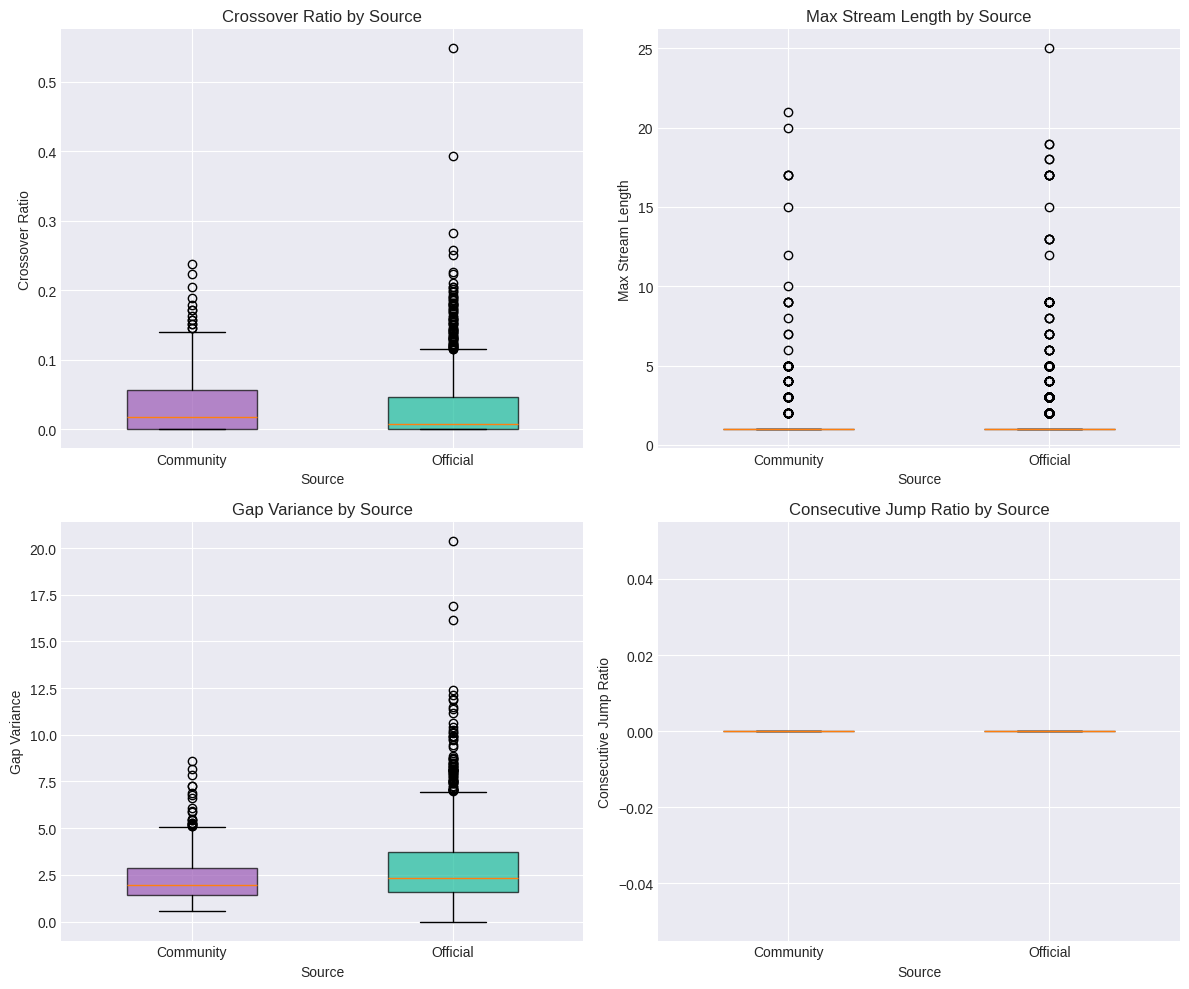

Pattern Style Feature Comparison (Mann-Whitney U Test):

Crossover Ratio:
  Community: mean=0.0345, median=0.0175
  Official:  mean=0.0283, median=0.0076
  p-value: 2.9690e-03 **

Max Stream Length:
  Community: mean=1.9240, median=1.0000
  Official:  mean=1.5687, median=1.0000
  p-value: 1.4701e-03 **

Gap Variance:
  Community: mean=2.3937, median=1.9812
  Official:  mean=2.9122, median=2.3156
  p-value: 3.1974e-07 ***

Consecutive Jump Ratio:
  Community: mean=0.0000, median=0.0000
  Official:  mean=0.0000, median=0.0000
  p-value: 1.0000e+00 


In [12]:
# Define additional pattern metrics
def crossover_ratio(tensor):
    """Fraction of steps that require hand crossing (L+D, L+U, R+D, R+U patterns)"""
    # Panel layout: Left=0, Down=1, Up=2, Right=3
    notes_per_step = np.sum(tensor, axis=1)
    active_mask = notes_per_step > 0
    if np.sum(active_mask) == 0:
        return 0
    
    # Crossover patterns: Left+Down, Left+Up, Right+Down, Right+Up
    crossovers = 0
    for step in tensor[active_mask]:
        if (step[0] and step[1]) or (step[0] and step[2]) or (step[3] and step[1]) or (step[3] and step[2]):
            crossovers += 1
    return crossovers / np.sum(active_mask)

def max_stream_length(tensor):
    """Longest consecutive sequence of non-empty timesteps"""
    active = np.sum(tensor, axis=1) > 0
    max_len = 0
    current_len = 0
    for a in active:
        if a:
            current_len += 1
            max_len = max(max_len, current_len)
        else:
            current_len = 0
    return max_len

def gap_variance(tensor):
    """Standard deviation of gaps between active timesteps (rhythm complexity)"""
    active_indices = np.where(np.sum(tensor, axis=1) > 0)[0]
    if len(active_indices) < 2:
        return 0
    gaps = np.diff(active_indices)
    return np.std(gaps)

def consecutive_jump_ratio(tensor):
    """Fraction of jumps that follow another jump"""
    notes_per_step = np.sum(tensor, axis=1)
    jumps = notes_per_step == 2
    if np.sum(jumps) < 2:
        return 0
    consecutive = 0
    for i in range(1, len(jumps)):
        if jumps[i] and jumps[i-1]:
            consecutive += 1
    return consecutive / np.sum(jumps)

# Calculate pattern features by source
features = {
    'Crossover Ratio': crossover_ratio,
    'Max Stream Length': max_stream_length,
    'Gap Variance': gap_variance,
    'Consecutive Jump Ratio': consecutive_jump_ratio
}

feature_by_source = {feat: {s: [] for s in sources} for feat in features}
for c in charts:
    for feat_name, feat_func in features.items():
        feature_by_source[feat_name][c['source']].append(feat_func(c['tensor']))

# Visualize all pattern features
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for idx, (feat_name, feat_data) in enumerate(feature_by_source.items()):
    bp = axes[idx].boxplot([feat_data[s] for s in sources], 
                           labels=[s.capitalize() for s in sources], 
                           patch_artist=True, widths=0.5)
    for patch, s in zip(bp['boxes'], sources):
        patch.set_facecolor(source_colors[s])
        patch.set_alpha(0.7)
    axes[idx].set_xlabel('Source')
    axes[idx].set_ylabel(feat_name)
    axes[idx].set_title(f'{feat_name} by Source')

plt.tight_layout()
plt.show()

# Statistical tests for each feature
print("Pattern Style Feature Comparison (Mann-Whitney U Test):")
print("=" * 60)
for feat_name, feat_data in feature_by_source.items():
    comm_data = feat_data['community']
    off_data = feat_data['official']
    
    if len(comm_data) > 0 and len(off_data) > 0:
        stat, p = stats.mannwhitneyu(comm_data, off_data, alternative='two-sided')
        print(f"\n{feat_name}:")
        print(f"  Community: mean={np.mean(comm_data):.4f}, median={np.median(comm_data):.4f}")
        print(f"  Official:  mean={np.mean(off_data):.4f}, median={np.median(off_data):.4f}")
        print(f"  p-value: {p:.4e} {'***' if p < 0.001 else '**' if p < 0.01 else '*' if p < 0.05 else ''}")

## 11. Summary Statistics

Dataset overview and key findings for the 2-head experiment.

In [13]:
print("=" * 70)
print("DATASET SUMMARY FOR 2-HEAD EXPERIMENT")
print("=" * 70)

# Overall counts
print("\n1. DATASET SIZE")
print("-" * 40)
print(f"   Total charts:        {len(charts)}")
print(f"   Total unique songs:  {len(set(c['song'] for c in charts))}")
print(f"   Failed to parse:     {len(failed)}")

# Source breakdown
print("\n2. SOURCE DISTRIBUTION")
print("-" * 40)
for s in sources:
    n_charts = sum(1 for c in charts if c['source'] == s)
    n_songs = len(set(c['song'] for c in charts if c['source'] == s))
    pct = 100 * n_charts / len(charts)
    print(f"   {s.capitalize():12} {n_charts:5} charts ({pct:5.1f}%) from {n_songs:4} songs")

# Difficulty breakdown by source
print("\n3. DIFFICULTY × SOURCE MATRIX")
print("-" * 40)
print(f"   {'':12} " + " ".join(f"{name[:4]:>8}" for name in DIFFICULTY_NAMES))
for s in sources:
    counts = [sum(1 for c in charts if c['source'] == s and c['difficulty_name'] == d) for d in DIFFICULTY_NAMES]
    print(f"   {s.capitalize():12} " + " ".join(f"{c:>8}" for c in counts))

# Class balance
print("\n4. CLASS BALANCE (for training)")
print("-" * 40)
class_counts = [sum(1 for c in charts if c['difficulty_class'] == i) for i in range(4)]
total = sum(class_counts)
for i, name in enumerate(DIFFICULTY_NAMES):
    pct = 100 * class_counts[i] / total
    bar = "#" * int(pct / 2)
    print(f"   {name:10} {class_counts[i]:5} ({pct:5.1f}%) {bar}")

# Source balance
print("\n5. SOURCE BALANCE (for 2-head)")
print("-" * 40)
for s in sources:
    n = sum(1 for c in charts if c['source'] == s)
    pct = 100 * n / len(charts)
    bar = "#" * int(pct / 2)
    print(f"   {s.capitalize():12} {n:5} ({pct:5.1f}%) {bar}")

# Key findings
print("\n6. KEY FINDINGS")
print("-" * 40)

# Check for significant source differences in features
all_tests_significant = []
test_features = ['step_density', 'jump_ratio']
for feat_name in test_features:
    if feat_name == 'step_density':
        data_comm = density_by_source['community']
        data_off = density_by_source['official']
    else:
        data_comm = jump_by_source['community']
        data_off = jump_by_source['official']
    
    if len(data_comm) > 0 and len(data_off) > 0:
        _, p = stats.mannwhitneyu(data_comm, data_off, alternative='two-sided')
        all_tests_significant.append(p < 0.05)

# Chi-square for difficulty distributions
chi2, p_diff, _, _ = stats.chi2_contingency(crosstab)
diff_dist_differs = p_diff < 0.05

print(f"   - Difficulty distributions differ by source: {'YES' if diff_dist_differs else 'NO'}")
print(f"   - Feature distributions differ by source: {'YES' if any(all_tests_significant) else 'NO'}")

# Recommendations
print("\n7. RECOMMENDATIONS FOR 2-HEAD EXPERIMENT")
print("-" * 40)
print("   - Source head: 2 classes (community=0, official=1)")
print("   - Difficulty head: 4 classes (Beginner=0, Easy=1, Medium=2, Hard=3)")
print(f"   - Consider class weighting for difficulty (imbalance ratio: {max(class_counts)/min(class_counts):.1f}x)")
print(f"   - Source ratio: {sum(1 for c in charts if c['source']=='community')/sum(1 for c in charts if c['source']=='official'):.2f}:1")

print("\n" + "=" * 70)

DATASET SUMMARY FOR 2-HEAD EXPERIMENT

1. DATASET SIZE
----------------------------------------
   Total charts:        2357
   Total unique songs:  611
   Failed to parse:     0

2. SOURCE DISTRIBUTION
----------------------------------------
   Community      421 charts ( 17.9%) from   99 songs
   Official      1936 charts ( 82.1%) from  521 songs

3. DIFFICULTY × SOURCE MATRIX
----------------------------------------
                    Begi     Easy     Medi     Hard
   Community          82       98      101      140
   Official          430      523      511      472

4. CLASS BALANCE (for training)
----------------------------------------
   Beginner     512 ( 21.7%) ##########
   Easy         621 ( 26.3%) #############
   Medium       612 ( 26.0%) ############
   Hard         612 ( 26.0%) ############

5. SOURCE BALANCE (for 2-head)
----------------------------------------
   Community      421 ( 17.9%) ########
   Official      1936 ( 82.1%) ###################################